In [575]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [576]:
data= pd.read_csv('/content/IRIS.csv')


In [577]:
'''feature= data.drop(columns=['species'])
target = data['species']'''

"feature= data.drop(columns=['species'])\ntarget = data['species']"

In [578]:
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica
60,5.0,2.0,3.5,1.0,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
128,6.4,2.8,5.6,2.1,Iris-virginica
9,4.9,3.1,1.5,0.1,Iris-setosa
82,5.8,2.7,3.9,1.2,Iris-versicolor


In [579]:
data = data.replace(r'^\s*$', np.nan, regex=True)

In [580]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [581]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='species', ylabel='count'>

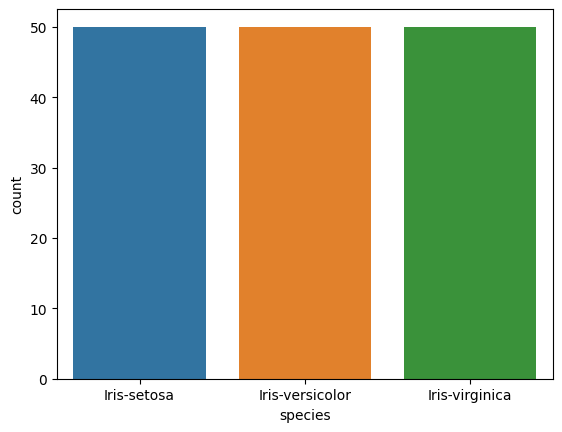

In [582]:
sns.countplot(x='species', data=data)

In [583]:
print(data.shape[0])


150


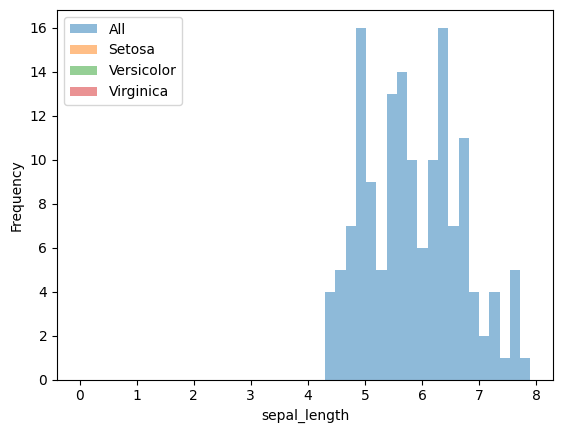

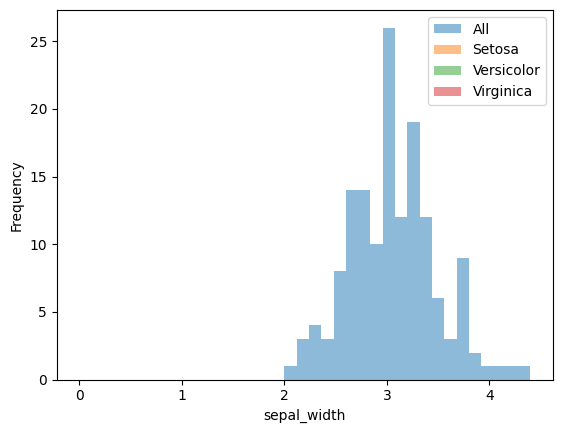

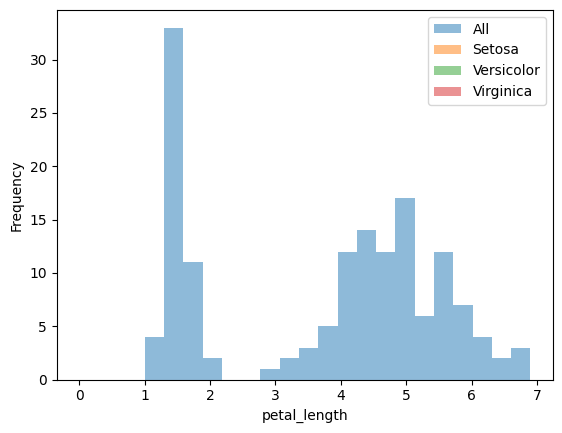

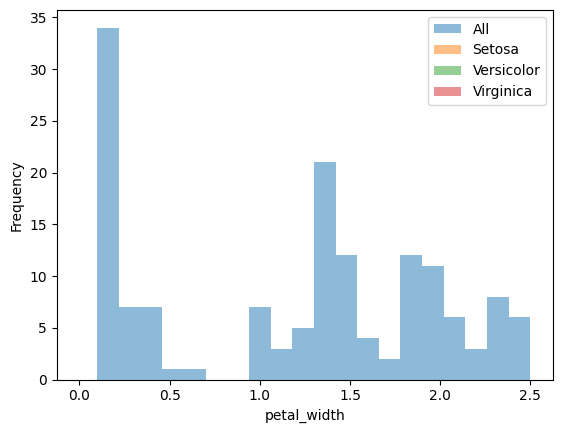

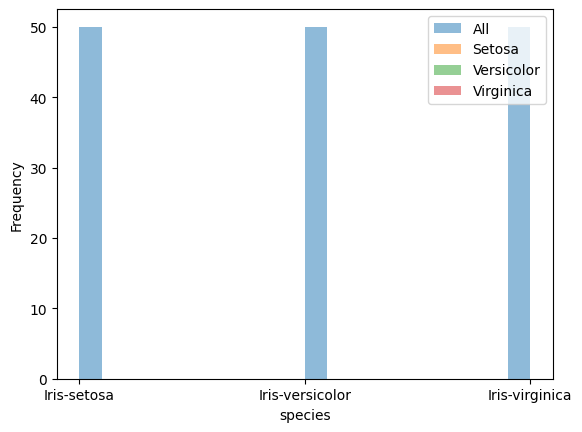

In [584]:
for feature in data.columns:
    plt.hist(data[feature], bins=20, alpha=0.5, label='All')
    plt.hist(data[data['species'] == 'Setosa'][feature], bins=20, alpha=0.5, label='Setosa')
    plt.hist(data[data['species'] == 'Versicolor'][feature], bins=20, alpha=0.5, label='Versicolor')
    plt.hist(data[data['species'] == 'Virginica'][feature], bins=20, alpha=0.5, label='Virginica')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


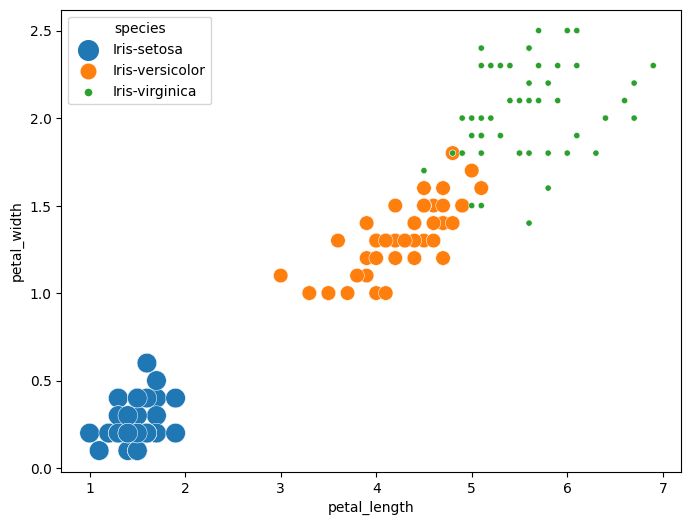

In [585]:
plt.figure(figsize=(8,6));
cmap = sns.cubehelix_palette(dark=.5, light=.9, as_cmap=True)
ax = sns.scatterplot(x="petal_length", y="petal_width",hue="species",size="species",sizes=(20,200),legend="full",data=data);


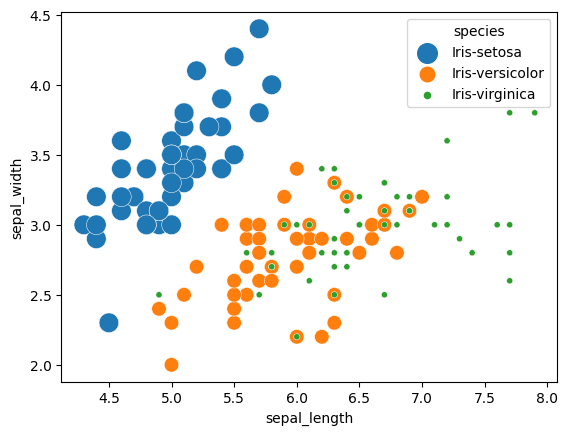

In [586]:
ay = sns.scatterplot(x="sepal_length", y="sepal_width",hue="species",size="species",sizes=(20,200),legend="full",data=data);

<Figure size 800x600 with 0 Axes>

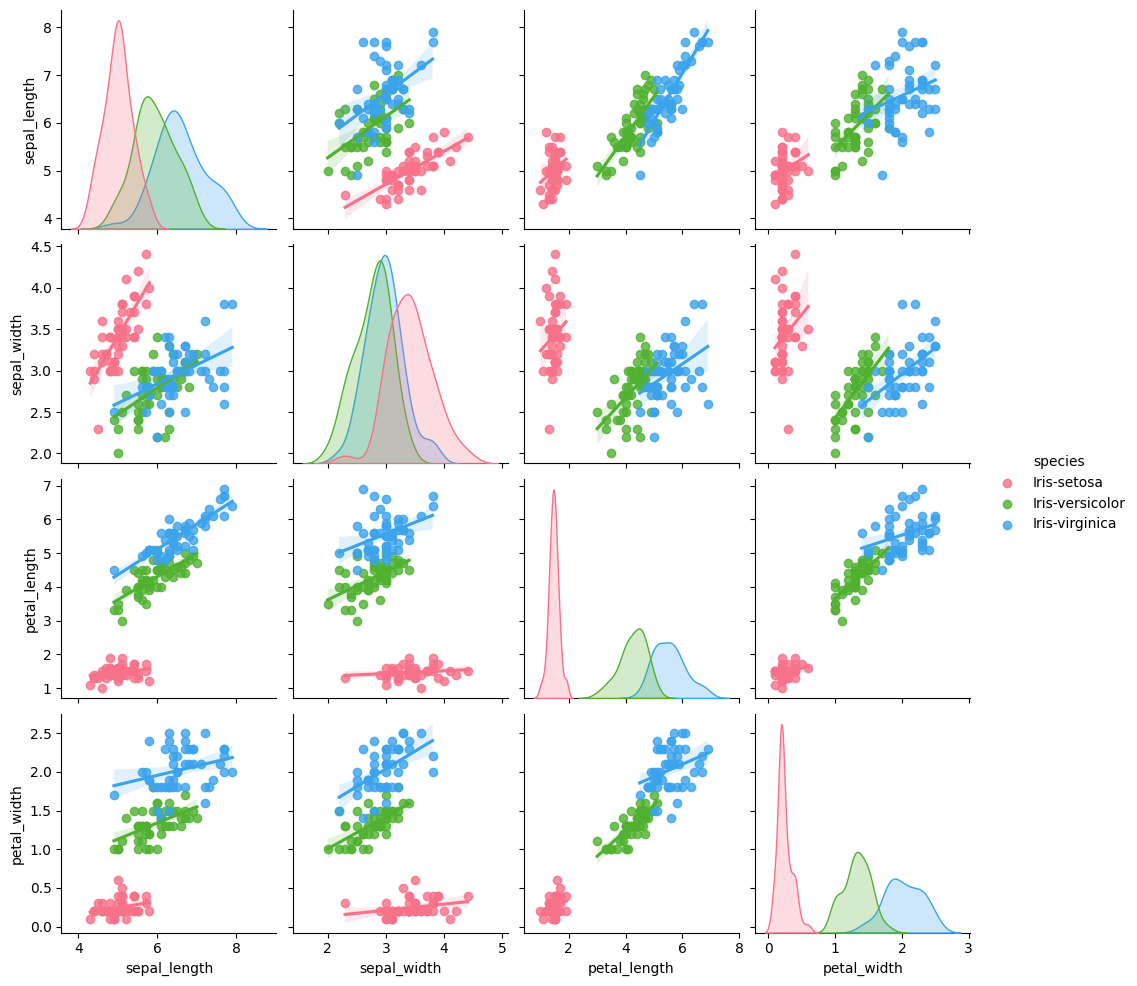

In [587]:
plt.figure(figsize=(8,6));
sns.pairplot(data,kind='reg',hue ='species',palette="husl" );


In [588]:
from sklearn.preprocessing import LabelEncoder
# Encode target labels with values 0 and 1
le = LabelEncoder()

# transfroming data in columns
for col in data.columns:
	if data[col].dtype == 'object':
		data[col] = le.fit_transform(data[col])


In [589]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [590]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = data.drop(columns=['species'])
Y = data['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [591]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have features x_train, x_test, and target variables y_train, y_test

# Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_logreg = logreg_model.predict(x_test)

# Print the accuracy
accuracy = logreg_model.score(x_test, y_test) * 100
print("Accuracy: {:.2f}%".format(accuracy))

# Print the classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Accuracy: 93.33%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.83      0.91        18
           2       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



In [592]:

# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# model training
model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [593]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming you have features x_train, x_test, and target variables y_train, y_test

# K-nearest neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_knn = knn_model.predict(x_test)

# Print the accuracy
accuracy = knn_model.score(x_test, y_test) * 100
print("Accuracy: {:.2f}%".format(accuracy))

# Print the classification report
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


Accuracy: 95.56%
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.89      0.94        18
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [594]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Assuming you have features x_train, x_test, and target variables y_train, y_test

# Decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_dt = dt_model.predict(x_test)

# Print out a classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.83      0.91        18
           2       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45

